# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [2]:
!wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

--2025-03-01 14:17:37--  https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0 [following]
--2025-03-01 14:17:38--  https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6df7328943d60054761e34abd6.dl.dropboxusercontent.com/cd/0/inline/ClCmyn3WPwxNItHSpvL7DR-BiuexS7ATaHoRnBOgiS2SuWuQZ_oqXASpzEZ7Eh4FsY48Ja4uVw04SWqs-1afLtvH3RDiaV12MirqLd63uaaczY7y_df42L8DpsuuSgfcHafnmyS8fX7inKSj3KowtWZo/file# [following]
--2025-03-01 14:17:38--  https://uc6df7328943d60054761e34ab

In [3]:
# !pip install catboost -q

In [4]:
# from catboost import CatBoostClassifier
# import pandas as pd
# import os
# from tqdm import tqdm

# INPUT_DIR = '.'

# train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
# train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
# test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
# test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
# sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

# df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

# df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [5]:
# df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
# df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
# df_train.shape, df_test.shape

In [6]:
# object_cols = []
# for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
#     if df_train[col].dtype == 'O':
#       object_cols.append(idx)

In [7]:
# X_train = df_train.drop('isFraud', axis=1)
# X_train = X_train.fillna('')
# y_train = df_train['isFraud'].values

# cb = CatBoostClassifier(iterations=3)
# cb.fit(X_train, y_train, object_cols, )

In [8]:
# predictions = cb.predict_proba(df_test.fillna(''))

In [9]:
# # sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
# sub.head()

In [10]:
# Сохранение submission
# sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [11]:
!pip install category_encoders phik -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

In [13]:
merged_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [14]:
merged_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [15]:
merged_df.shape

(417559, 434)

## 1.1. Проверка пропусков

In [16]:
merged_df.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,309286
id_37,309286
id_38,309286
DeviceType,309435


In [17]:
missing_percentage = merged_df.isna().mean() * 100
missing_percentage[missing_percentage > 50].index

Index(['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11',
       'D12',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=229)

Видно, что значительная доля колонок имеет более 50% пропусков в данных.

In [18]:
merged_df['V330'].value_counts()

,count
V330,
0.0,59682
1.0,3983
2.0,1263
3.0,451
4.0,158
5.0,73
11.0,43
6.0,38
8.0,30


In [19]:
merged_df['V335'].value_counts()

,count
V335,
0.0,59637
100.0,698
50.0,678
150.0,331
25.0,314
...,...
3300.0,1
6875.0,1
55125.0,1


In [20]:
merged_df['V338'].value_counts()

,count
V338,
0.0,59245
100.0,1039
200.0,666
50.0,588
150.0,504
...,...
1495.0,1
1320.0,1
7.5,1


Учитывая высокую долю пропусков их удаление приведет к существенной потере данных и ухудшению каества модели. Целесообразно использовать модели машинного обучения, которые хорошо справляются с пропусками в данных (модели на основе решающих деревьев, бустинги)

## 1.2. Проверка дубликатов

In [21]:
merged_df.duplicated().sum()

0

In [22]:
merged_df.drop('isFraud', axis=1).duplicated().sum()

0

Дубликаты отсутствуют.

## 1.3. Анализ целевой переменной

<Axes: >

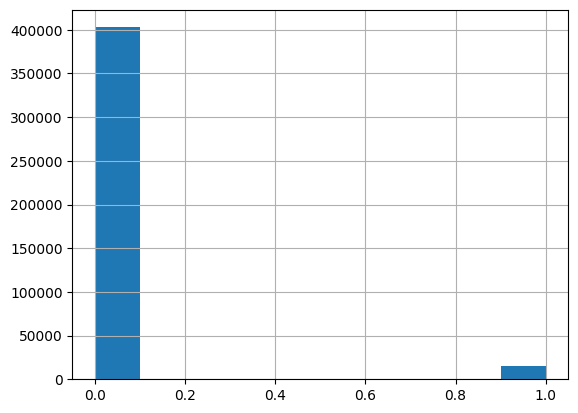

In [23]:
merged_df.isFraud.hist()

In [24]:
merged_df.isFraud.value_counts()

,count
isFraud,
0,402838
1,14721


Видим, что присутствует существенный дисбаланс классов, что наверное логично (поскольку большинство транзакций всё-таки должны быть нефродовыми). В этой связи метрика Accuracy не подходит для оценки модели. Вместо этого стоит использовать ROC-AUC, которая объединяет преимущества Precision и Recall, но при этом не зависит от выбранного порога.

## 1.4. Анализ категориальных признаков

In [25]:
merged_df.select_dtypes(include=['object']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [26]:
merged_df.describe(include='object')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,417559,416730,416733,352649,103820,194116,194116,194116,215646,165564,...,62096,107961,57819,62168,108273,108273,108273,108273,108124,91959
unique,5,4,4,59,60,2,2,2,3,2,...,71,110,183,4,2,2,2,2,2,1551
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
freq,301297,272753,306554,160974,43010,194098,173868,152682,136257,91343,...,16078,21821,13466,46931,62152,102536,84398,57779,66324,36841


In [27]:
binary_cols = [col for col in merged_df.columns if
               set(str(x).upper() for x in merged_df[col].dropna().unique()) == {'F', 'T'}]

binary_cols

['M1',
 'M2',
 'M3',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

Переменные М1-М3, М5-М9, id_35-id_38 можно закодировать как 1 и 0 (посольку принимает значения только T и F). Для ProductCD, card4, card6, M4 - можно попробовать OHE, поскольку количество категорий невелико. Для переменных P_emaildomain, R_emaildomain видимо целесообразно использовать target encoder.

In [28]:
ohe_cols = ['ProductCD', 'card4', 'card6', 'M4']
target_cols = ['P_emaildomain', 'R_emaildomain']

In [29]:
binary_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoder())
])

ohe_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

target_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('target', target_transformer, target_cols)
    ]
)

## 1.5. Оценка корреляций

interval columns not set, guessing: ['TransactionAmt', 'TransactionDT']


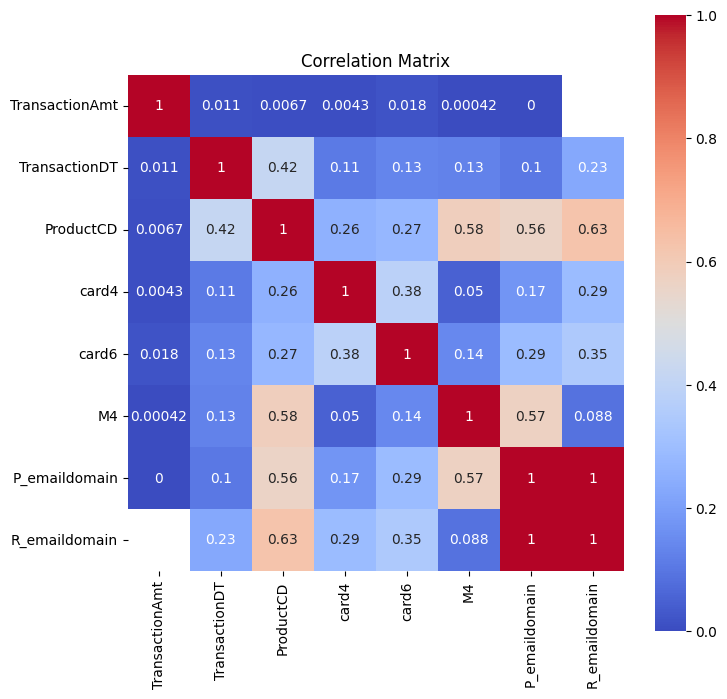

In [30]:
correlation_matrix = merged_df[['TransactionAmt', 'TransactionDT',
                                        'ProductCD', 'card4', 'card6', 'M4',
                                        'P_emaildomain', 'R_emaildomain']].phik_matrix()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

 Видим практически полную корреляцию между 'P_emaildomain', 'R_emaildomain', а также высокую корреляцию этих признаков с ProductCD

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

## 2.1. Логит регрессия

In [31]:
X_train = merged_df.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = merged_df['isFraud'].values

In [32]:
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [ ]:
scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=4, scoring=roc_auc_score)

print("ROC AUC scores on each fold:", scores)
print("Average ROC AUC:", scores.mean())

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

In [ ]:
# ваша работа с аномалиями здесь

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [ ]:
# ваши эксперименты с кластеризацией здесь

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [ ]:
# ваш AutoML здесь

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

In [ ]:
# ваши эксперименты здесь

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

In [ ]:
# не забудьте прикрепить скриншоты лидерборда, пожалуйста